In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                   'k2':['alpha','beta','alpha','beta','alpha'],
                    'dataset1':np.random.randn(5),
                    'dataset2':np.random.randn(5),
                   })

In [3]:
dframe

,k1,k2,dataset1,dataset2
0,X,alpha,-2.049469,1.194510
1,X,beta,-0.939563,1.673940
2,Y,alpha,-0.760218,-0.650520
3,Y,beta,-0.066704,0.897486
4,Z,alpha,0.562312,0.048516


In [6]:
group1 = dframe['dataset1'].groupby(dframe['k1'])
group1

In [8]:
group1.mean()

k1
X   -1.494516
Y   -0.413461
Z    0.562312
Name: dataset1, dtype: float64

In [ ]:
# 外部のデータをキーとして持ってくる（定義）
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])
#  それぞれでグループ化
dframe['dataset1'].groupby([cities,month]).mean()

In [10]:
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-1.494516,1.434225
Y,-0.413461,0.123483
Z,0.562312,0.048516


In [11]:
# 複数列の指定
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha -2.049469  1.194510
   beta  -0.939563  1.673940
Y  alpha -0.760218 -0.650520
   beta  -0.066704  0.897486
Z  alpha  0.562312  0.048516

In [17]:
#出力列を限定する
dataset2_group = dframe.groupby(['k1','k2'])[['dataset2']]
dataset2_group.mean()

dataset2
k1 k2             
X  alpha  1.194510
   beta   1.673940
Y  alpha -0.650520
   beta   0.897486
Z  alpha  0.048516

In [23]:
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-1.494516,1.434225
Y,-0.413461,0.123483
Z,0.562312,0.048516


In [22]:
for name, group in dframe.groupby('k1'):
    print('this is the {} group'.format(name))
    print(group)
    print('\n')

this is the X group
  k1     k2  dataset1  dataset2
0  X  alpha -2.049469   1.19451
1  X   beta -0.939563   1.67394


this is the Y group
  k1     k2  dataset1  dataset2
2  Y  alpha -0.760218 -0.650520
3  Y   beta -0.066704  0.897486


this is the Z group
  k1     k2  dataset1  dataset2
4  Z  alpha  0.562312  0.048516




In [28]:
for name, group in dframe.groupby(['k1','k2']):
    print('this is the {} group'.format(name))
    print(group)
    print('\n')

this is the ('X', 'alpha') group
  k1     k2  dataset1  dataset2
0  X  alpha -2.049469   1.19451


this is the ('X', 'beta') group
  k1    k2  dataset1  dataset2
1  X  beta -0.939563   1.67394


this is the ('Y', 'alpha') group
  k1     k2  dataset1  dataset2
2  Y  alpha -0.760218  -0.65052


this is the ('Y', 'beta') group
  k1    k2  dataset1  dataset2
3  Y  beta -0.066704  0.897486


this is the ('Z', 'alpha') group
  k1     k2  dataset1  dataset2
4  Z  alpha  0.562312  0.048516




In [29]:
gr = dframe.groupby('k1')
gr.get_group('X')

,k1,k2,dataset1,dataset2
0,X,alpha,-2.049469,1.19451
1,X,beta,-0.939563,1.67394


In [30]:
group_dict = dict(list(dframe.groupby('k1')))

In [31]:
group_dict['X']

,k1,k2,dataset1,dataset2
0,X,alpha,-2.049469,1.19451
1,X,beta,-0.939563,1.67394


In [32]:
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes, axis = 1)))

In [33]:
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0 -2.049469  1.194510
 1 -0.939563  1.673940
 2 -0.760218 -0.650520
 3 -0.066704  0.897486
 4  0.562312  0.048516,
 dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [47]:
animals = DataFrame(np.arange(16).reshape(4, 4),
                   columns=['W', 'X', 'Y', 'Z'],
                   index=['Dog', 'Cat', 'Bird', 'Mouse'])

In [48]:
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [49]:
animals.loc['Cat', ['W', 'Y']] = np.nan 
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [50]:
behavior_map =  {'W': 'bad', 'X': 'good', 'Y': 'bad','Z': 'good'}

In [51]:
animals_col = animals.groupby(behavior_map, axis = 1)

In [52]:
animals_col.sum()

,bad,good
Dog,2.0,4.0
Cat,0.0,12.0
Bird,18.0,20.0
Mouse,26.0,28.0


In [54]:
behavior_series = Series(behavior_map)
behavior_series

W     bad
X    good
Y     bad
Z    good
dtype: object

In [59]:
animals.groupby(behavior_series, axis =1).count()

,bad,good
Dog,2,2
Cat,0,2
Bird,2,2
Mouse,2,2


In [60]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [62]:
animals.groupby(len).sum()

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [64]:
keys = ['A', 'B', 'A', 'B']
animals.groupby([len, keys]).sum()

W   X     Y   Z
3 A   0.0   1   2.0   3
  B   0.0   5   0.0   7
4 A   8.0   9  10.0  11
5 B  12.0  13  14.0  15

## Lec 44 Aggregation


In [1]:
# 機械学習用のサンプルデータセット：ワインの質
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [4]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [5]:
# データの確認　ワイン一本一本に対する分析結果及び専門家による評価
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
dframe_wine['alcohol'].mean()

10.422983114446502

In [7]:
dframe_wine['quality'].mean()

5.6360225140712945

In [8]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [11]:
wino = dframe_wine.groupby('quality')
wino.describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [12]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [13]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [14]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality']/dframe_wine['alcohol']

In [15]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.510204
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.510204
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.612245
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.476190
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.535714
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.545455
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.490196


In [16]:
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [17]:
%matplotlib inline

<AxesSubplot:>

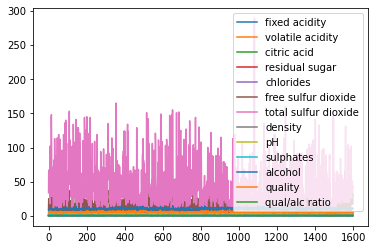

In [18]:
dframe_wine.plot()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

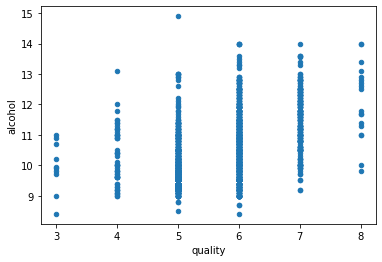

In [19]:
dframe_wine.plot(kind='scatter', x='quality', y='alcohol')

## Lec 45

In [17]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [18]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [20]:

# アルコール度数で並べ替えます。
dframe_wine.sort_values('alcohol', ascending=False, inplace=True)
# groupbyのあと、先ほどの関数を適用します。
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [21]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,3


In [25]:
num_of_qual = dframe_wine['quality'].value_counts()

In [26]:
# 各品質毎のワイン本数
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [27]:
# alc_content_rankが１のワインをクオリティーでソートする
dframe_wine[dframe_wine.alc_content_rank == 1].sort_values('quality')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1


## Lec46 クロス集計表

In [28]:
from io import StringIO

In [30]:
data ="""Sample  Animal   Intelligence
1   Dog   Dumb
2 Dog Dumb
3   Cat Smart
4 Cat    Smart
5 Dog Smart
6 Cat Smart"""
dframe = pd.read_table(StringIO(data), sep = '\s+')
dframe

,Sample,Animal,Intelligence
0,1,Dog,Dumb
1,2,Dog,Dumb
2,3,Cat,Smart
3,4,Cat,Smart
4,5,Dog,Smart
5,6,Cat,Smart


In [31]:
# クロス集計を取る
pd.crosstab(dframe.Animal , dframe.Intelligence)

Intelligence,Dumb,Smart
Animal,,
Cat,0,3
Dog,2,1


In [33]:
pd.crosstab(dframe.Animal , dframe.Intelligence, margins = True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,0,3,3
Dog,2,1,3
All,2,4,6
